In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
def parsetime(time_str):
    if isinstance(time_str, str):
        fields = time_str.split(':')
    else:
        fields = time_str
    assert len(fields) == 3
    hour = float(fields[0].strip())
    mini = float(fields[1].strip())
    seconds = float(fields[2].strip())
    return hour * 3600 + mini * 60 + seconds

In [3]:
log_torcg_path = '../exps/try/log_0.1lr_50iters_torch'
logs_torch = []
with open(log_torcg_path) as f:
    for line in f.readlines():
        if line.startswith('epoch'):
            line = line.strip()
            fields = line.split(',')
            log = [float(field.split(':')[1].strip()) for field in fields]
            logs_torch.append(log)
logs_torch = np.array(logs_torch)
# logs_torch[:, 2] = np.cumsum(logs_torch[:, 2]) / np.arange(1, len(logs_torch) + 1)
# logs_torch[:, 4] = np.cumsum(logs_torch[:, 4]) / np.arange(1, len(logs_torch) + 1)
print(logs_torch[0])

[   1.       0.951  263.161    0.642  256.748]


In [4]:
log_csharp_path = '../exps/try/log_0.1lr_50iters_csharp'
logs_csharp = [] 
with open(log_csharp_path) as f:
    loss = None
    cost = None
    for line in f.readlines():
        if line.startswith('Training Loss'):
            l = line.split(':')[1].strip()
            loss = float(l)
        if line.startswith('Training Runing Time'):
            l = line.split(':')
            cost = parsetime(l[1:])
            logs_csharp.append((len(logs_csharp)+1, loss, cost))
logs_csharp = np.array(logs_csharp)
# logs_csharp[:, 2] = np.cumsum(logs_csharp[:, 2]) / np.arange(1, len(logs_csharp) + 1)
print(logs_csharp[0])

[  1.           1.11898975  66.2647323 ]


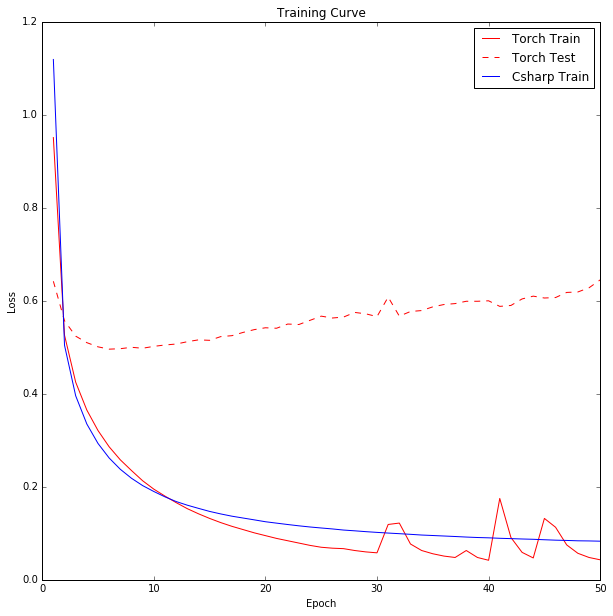

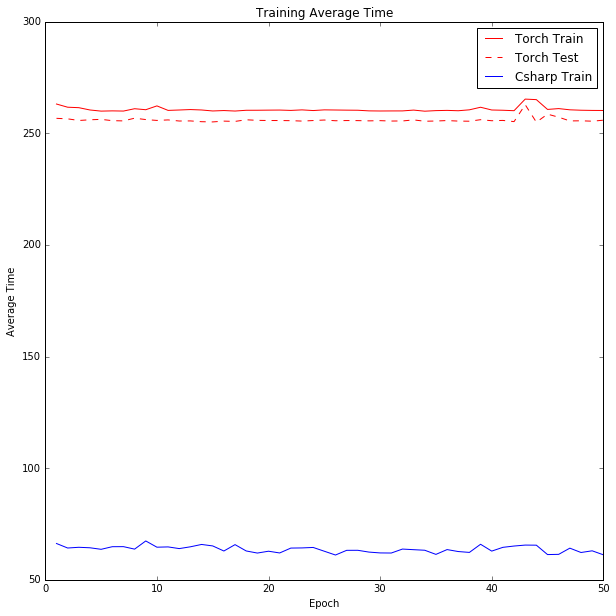

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(logs_torch[:, 0], logs_torch[:, 1], 'r-', label='Torch Train')
plt.plot(logs_torch[:, 0], logs_torch[:, 3], 'r--', label='Torch Test')
plt.plot(logs_csharp[:, 0], logs_csharp[:, 1], 'b-', label='Csharp Train')
plt.title('Training Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.savefig('../vis/no_regularization_training_curve.jpg')

plt.figure(figsize=(10, 10))
plt.plot(logs_torch[:, 0], logs_torch[:, 2], 'r-', label='Torch Train')
plt.plot(logs_torch[:, 0], logs_torch[:, 4], 'r--', label='Torch Test')
plt.plot(logs_csharp[:, 0], logs_csharp[:, 2], 'b-', label='Csharp Train')
plt.title('Training Average Time')
plt.xlabel('Epoch')
plt.ylabel('Average Time')
plt.legend(loc='best')
plt.savefig('../vis/no_regularization_training_average_time.jpg')